In [216]:
#This project is my first personal project on basic Data Science and Machine Learning Modelling

In [217]:
#We get a dataset of Students Perfomance, the goal is to try to predict what features mainly affect grades and
#academic performance

In [218]:
#import essential libraries
import numpy as np
import pandas as pd
import io
from google.colab import files

In [219]:
#Import the data set (which has been extracted from Kaggle)
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance (3).csv


In [220]:
#First, Intuitions, what can affect a student grades?
# - Family environment (parents, status, etc..)
# - Past academic performance
# - Age?
# - Location?
# - Gender?
# - Race?

#To sort out this questions we have to rely on data, not a vague hypothesis!

In [221]:
#Lets explore the data
data = pd.read_csv(io.StringIO(uploaded['StudentsPerformance.csv'].decode('utf-8')))
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [222]:
#Lets look at basic stats of the data
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [224]:
#The first conclusions we can extract just by looking at the data:
# - Our feature variables are all categorial, hence we will need to process them.
# - We can have 3 targets: Math score, Reading score, Writing score


In [225]:
#null values in data could affect our predictions
data.isnull().any()
#so no null values in data

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [226]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [227]:
#Lets create an average score for each student
data['Avg Score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
data.drop('math score', 1, inplace=True)
data.drop('reading score', 1, inplace=True)
data.drop('writing score', 1, inplace=True)

In [228]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Avg Score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94.000000
996,male,group C,high school,free/reduced,none,57.333333
997,female,group C,high school,free/reduced,completed,65.000000
998,female,group D,some college,standard,completed,74.333333


In [229]:
#As we can see, feature variables are categorical, so we need to encode them into numerical values
#There are the ways to do so:
# - Drop categorical variables(not viable)
# - Label encode them
# - One hot enconde them(too many different types of variables)
# Hence, we are going to label encode them

In [230]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
feature_columns = []
for c in data.columns:
  if c != 'Avg Score':
    data[c] = label_encoder.fit_transform(data[c])
    feature_columns.append(c)

In [231]:
#As we can see categorical values have been encoded
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Avg Score
0,0,1,1,1,1,72.666667
1,0,2,4,1,0,82.333333
2,0,1,3,1,1,92.666667
3,1,0,0,0,1,49.333333
4,1,2,4,1,1,76.333333
...,...,...,...,...,...,...
995,0,4,3,1,0,94.000000
996,1,2,2,0,1,57.333333
997,0,2,2,0,0,65.000000
998,0,3,4,1,0,74.333333


In [232]:
#Lets divide between features and labels now
X = data[feature_columns]
data.drop(feature_columns, 1, inplace=True)

In [233]:
#Lets check the format is good in both the features and labels
y = pd.DataFrame(data)

In [234]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 1)

In [235]:
#Import Decission Tree Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [236]:
#Predict values using the selected model
y_pred = clf.predict(X_test)
mean_absolute_error(y_test, y_pred)

11.98465642382309

In [237]:
# Have we used the proper model? Some conclusions below:
#   - We have used categorical values to predict a 'continious' value -> Avg Score
#   - Should we have categorized avg score and have usen a DecissionTreeClassifier?
#   - Lets run a quick test to see it...

In [257]:
#Some data processing...
data = pd.read_csv(io.StringIO(uploaded['StudentsPerformance.csv'].decode('utf-8')))
data['Avg Score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
data.drop('math score', 1, inplace=True)
data.drop('reading score', 1, inplace=True)
data.drop('writing score', 1, inplace=True)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Avg Score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94.000000
996,male,group C,high school,free/reduced,none,57.333333
997,female,group C,high school,free/reduced,completed,65.000000
998,female,group D,some college,standard,completed,74.333333


In [239]:
data['Avg Score'].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: Avg Score, dtype: float64

In [256]:
#we can see the minimum score is 9 and maximum is 100.
#lets create a normal grading system with: Failed, Passed, Notable, Excellent
#So now, lets categorize the Avg Score, we will create our own label encoder
def grade_label_encoder(grades):
  mark = []
  for grade in grades:
    if grade < 50:
      mark.append('Failed')
    elif grade >=50 and grade < 70:
      mark.append('Passed')
    elif grade >= 70 and grade < 90:
      mark.append('Notable')
    elif grade >= 90 and grade <= 100:
      mark.append('Excellent')
    else:
      mark.append('N/A')
  return mark


In [258]:
encoded_grades = grade_label_encoder(data['Avg Score'])
avg_scores = pd.DataFrame(data = encoded_grades, columns=['Avg Score'])
data['Avg Score'] = avg_scores


In [259]:
#In the previous cell we just did some preprocessing in order to end up having a full categorical DataFrame
#We have to label encode all of the categorical variables in order to add them to our model
lE = LabelEncoder()
for c in data.columns:
  data[c] = lE.fit_transform(data[c])
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Avg Score
0,0,1,1,1,1,2
1,0,2,4,1,0,2
2,0,1,3,1,1,0
3,1,0,0,0,1,1
4,1,2,4,1,1,2
...,...,...,...,...,...,...
995,0,4,3,1,0,0
996,1,2,2,0,1,3
997,0,2,2,0,0,3
998,0,3,4,1,0,2


In [260]:
#Lets split the data
X = data[feature_columns]
data.drop(feature_columns, 1, inplace=True)
y = pd.DataFrame(data)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 1)

In [263]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [267]:
#Lets predict the values
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: {}".format(acc))

The accuracy of the model is: 0.45666666666666667


In [268]:
#We can see we have improved a little bit the accuracy of the model. Probably it is still likely to be optimized!
#Lets visualize some results then...

In [279]:
X['Avg Score'] = y.copy()
correlation_matrix = X.corr()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


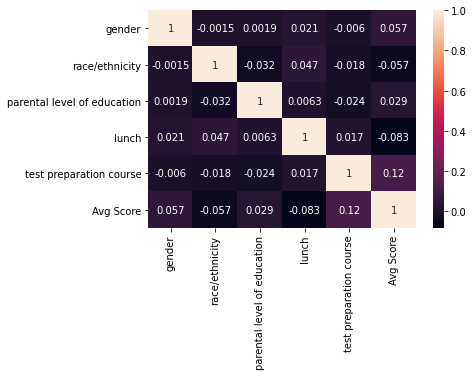

In [281]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(correlation_matrix, annot=True)
plt.show()